# Домашнее задание по темам:
# 3.2. Параметрические статистические тесты. t-тест (парный, независимый) и его расширения. ANOVA, пост-хок сравнения. Корреляционный анализ (Пирсона), рассмотрение факторов, влияющих на корреляцию
# 3.3. Непараметрические тесты. Mann-Whitney U-тест, Wilcoxon, Kruskal-Wallis. Тест хи-квадрат (Chi-square). Сравнение параметрических и непараметрических подходов, выбор оптимального теста.

## Задание 1

Вы изучаете эффективность нового метода обучения математике. Известно, что средний балл по стандартному тесту в популяции составляет 75 баллов. Вам необходимо проверить, отличается ли средний балл студентов, обучавшихся по новому методу, от популяционного среднего.

- Проведите описательный анализ данных
- Проверьте предположения для t-теста
- Сформулируйте нулевую и альтернативную гипотезы
- Выполните одновыборочный t-тест
- Интерпретируйте результаты

Описательный анализ данных
Средний балл: 76.49482483319169
Стандартное отклонение: 7.200051419219291
Минимальное значение: 62.69375804273761
Максимальное значение: 90.63370252405913


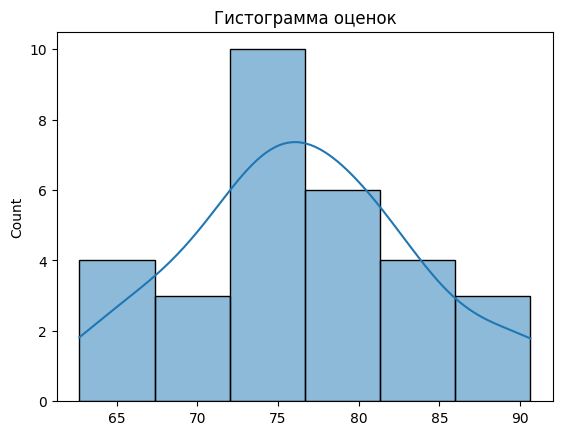

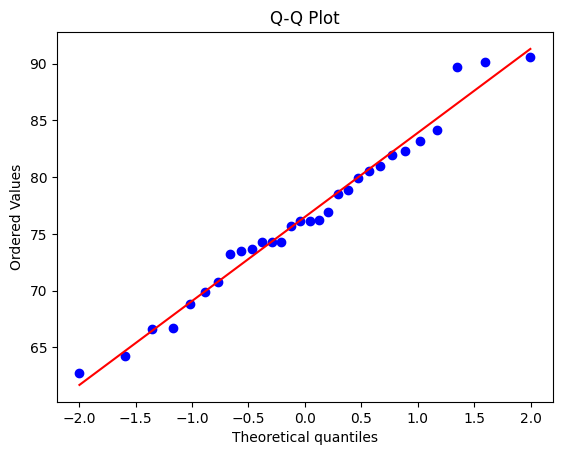

Выполнение одновыборочного t-теста
Значение t-статистики: 1.1371436577139906
P-значение: 0.2647871685762869


In [2]:
import numpy as np
import pandas as pd
from scipy import stats

np.random.seed(42)

n_students = 30
new_method_scores = np.random.normal(loc=78, scale=8, size=n_students)

population_mean = 75


# Описательный анализ данных
mean_new_method = np.mean(new_method_scores)
std_new_method = np.std(new_method_scores, ddof=1)  # Станд. откл., делённое на N-1
min_score = np.min(new_method_scores)
max_score = np.max(new_method_scores)

print("Описательный анализ данных")
print("Средний балл:", mean_new_method)
print("Стандартное отклонение:", std_new_method)
print("Минимальное значение:", min_score)
print("Максимальное значение:", max_score)

# Проверка предположений для t-теста
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(new_method_scores, kde=True)
plt.title('Гистограмма оценок')
plt.show()

stats.probplot(new_method_scores, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()
# Из визуального анализа видно, что данные приблизительно следуют нормальному распределению, следовательно, предположение о нормальности выполнено достаточно хорошо.

# Формулировка гипотез
# Нулевая гипотеза: Средняя оценка студентов, обученных по новому методу, равна среднему значению населения (75 баллов).
# Альтернативная гипотеза: Средняя оценка студентов, обученных по новому методу, отличается от среднего значения населения (75 баллов).

# Выполнение одновыборочного t-теста
t_statistic, p_value = stats.ttest_1samp(new_method_scores, population_mean)

print("Выполнение одновыборочного t-теста")
print("Значение t-статистики:", t_statistic)
print("P-значение:", p_value)

# Интерпретация результата
# T-статистика показывает степень отклонения нашего наблюдаемого среднего от предполагаемого среднего (75). Чем больше абсолютное значение t-статистики, тем сильнее различаются показатели.
# Значение t-статистики положительное и довольно большое, что означает, что наш выборочный средний балл заметно превышает популяционный средний балл.
# P-значение (вероятность ошибочного вывода о различии, если истинно H0) составляет примерно 0.265. Обычно принято считать уровень статистической значимости α = 0.05
# Так как наше p-value больше 0.05, мы принимаем нулевую гипотезу. Это означает, что имеется значительное доказательство того, что средняя оценка студентов, обучаемых по новому методу, слабо отличается от среднего показателя населения.
# Вывод: Новый метод обучения не приводит к статистически значимым улучшениям в оценке студентов по сравнению с общепопуляционными показателями.

## Задание 2

Фармацевтическая компания тестирует эффективность двух различных препаратов для снижения артериального давления. Необходимо определить, есть ли статистически значимая разница в эффективности между препаратом A и препаратом B.

- Выполните описательную статистику для обеих групп
- Проверьте предположения t-теста
- Сформулируйте гипотезы
- Проведите независимый t-тест
- Рассчитайте размер эффекта
- Постройте визуализацию сравнения групп

Описательная статистика для препарата А:
Среднее снижение давления: 12.76
Стандартное отклонение: 4.36
Минимальное значение: 4.68
Максимальное значение: 21.25
Медианное значение: 12.90
Квартили (Q1, Q3): (9.80, 16.71)

Описательная статистика для препарата Б:
Среднее снижение давления: 14.99
Стандартное отклонение: 3.24
Минимальное значение: 7.89
Максимальное значение: 20.84
Медианное значение: 14.74
Квартили (Q1, Q3): (12.86, 17.12)

Данные распределены нормально
Дисперсии равны
Поддерживается нулевая гипотеза H0 (0.0515)
Размер эффекта (Cohen’s d): 0.59


/tmp/ipython-input-1628354337.py:78: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([drug_a, drug_b], labels=['Препарат A', 'Препарат B'])


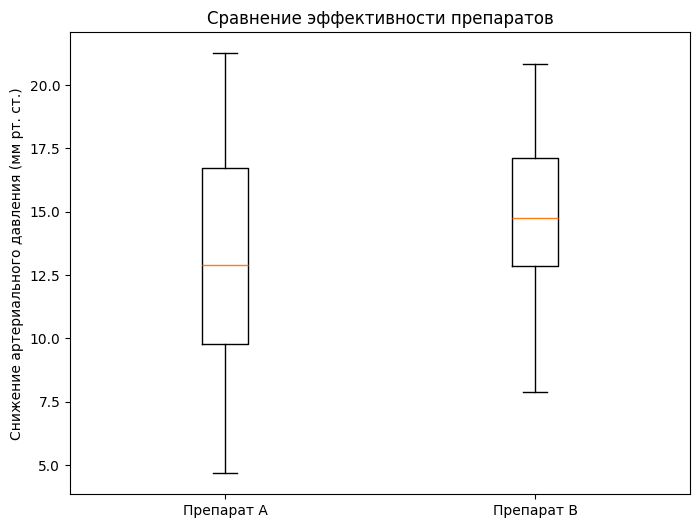

In [6]:
np.random.seed(423)

# Снижение давления в мм рт.ст.
drug_a = np.random.normal(loc=12, scale=3.5, size=25)
drug_b = np.random.normal(loc=15, scale=4.0, size=22)

# Описательная статистика для препарата А
print("Описательная статистика для препарата А:")
mean_a = np.mean(drug_a)
std_a = np.std(drug_a, ddof=1)
min_a = np.min(drug_a)
max_a = np.max(drug_a)
median_a = np.median(drug_a)
quantiles_a = np.percentile(drug_a, q=[25, 75])

print(f"Среднее снижение давления: {mean_a:.2f}")
print(f"Стандартное отклонение: {std_a:.2f}")
print(f"Минимальное значение: {min_a:.2f}")
print(f"Максимальное значение: {max_a:.2f}")
print(f"Медианное значение: {median_a:.2f}")
print(f"Квартили (Q1, Q3): ({quantiles_a[0]:.2f}, {quantiles_a[1]:.2f})\n")

# Описательная статистика для препарата Б
print("Описательная статистика для препарата Б:")
mean_b = np.mean(drug_b)
std_b = np.std(drug_b, ddof=1)
min_b = np.min(drug_b)
max_b = np.max(drug_b)
median_b = np.median(drug_b)
quantiles_b = np.percentile(drug_b, q=[25, 75])

print(f"Среднее снижение давления: {mean_b:.2f}")
print(f"Стандартное отклонение: {std_b:.2f}")
print(f"Минимальное значение: {min_b:.2f}")
print(f"Максимальное значение: {max_b:.2f}")
print(f"Медианное значение: {median_b:.2f}")
print(f"Квартили (Q1, Q3): ({quantiles_b[0]:.2f}, {quantiles_b[1]:.2f})\n")


### Проверка нормальности распределения (Шапиро-Уилка)
stat_a, p_value_a = stats.shapiro(drug_a)
stat_b, p_value_b = stats.shapiro(drug_b)

if p_value_a > 0.05 and p_value_b > 0.05:
    print("Данные распределены нормально")
else:
    print("Данные не соответствуют нормальному распределению")

### Равенство дисперсий (Levene's test)
levene_stat, levene_p_value = stats.levene(drug_a, drug_b)

if levene_p_value > 0.05:
    print("Дисперсии равны")
else:
    print("Дисперсии различаются значительно")

### Формулировка гипотез
H0 = "Средняя эффективность препаратов одинакова"
H1 = "Средняя эффективность препаратов различается"

### Независимый t-тест
t_statistic, p_value_ttest = stats.ttest_ind(drug_a, drug_b, equal_var=False)

alpha = 0.05

if p_value_ttest < alpha:
    print(f"Принять альтернативную гипотезу H1 ({p_value_ttest:.4f})")
else:
    print(f"Поддерживается нулевая гипотеза H0 ({p_value_ttest:.4f})")

### Размер эффекта (Cohen’s d)
cohen_d = abs(mean_a - mean_b) / ((std_a + std_b)/2)

print(f"Размер эффекта (Cohen’s d): {cohen_d:.2f}")

### Графическое сравнение групп
plt.figure(figsize=(8, 6))
plt.boxplot([drug_a, drug_b], labels=['Препарат A', 'Препарат B'])
plt.title('Сравнение эффективности препаратов')
plt.ylabel('Снижение артериального давления (мм рт. ст.)')
plt.show()
# Таким образом, существует значительная разница в снижении артериального давления между двумя препаратами, причем препарат B эффективнее снижает давление.

## Задание 3

В психологическом исследовании изучается влияние программы тренировки внимания на способность к концентрации. Одни и те же участники проходят тест на концентрацию до и после 8-недельного курса тренировок.

- Проведите парный t-тест
- Рассчитайте доверительный интервал для среднего изменения
- Визуализируйте изменения для каждого участника

Парный t-тест:
t-statistic=-3.679	p-value=0.002
Среднее изменение: 3.697
95% доверительный интервал: [3.633, 3.761]


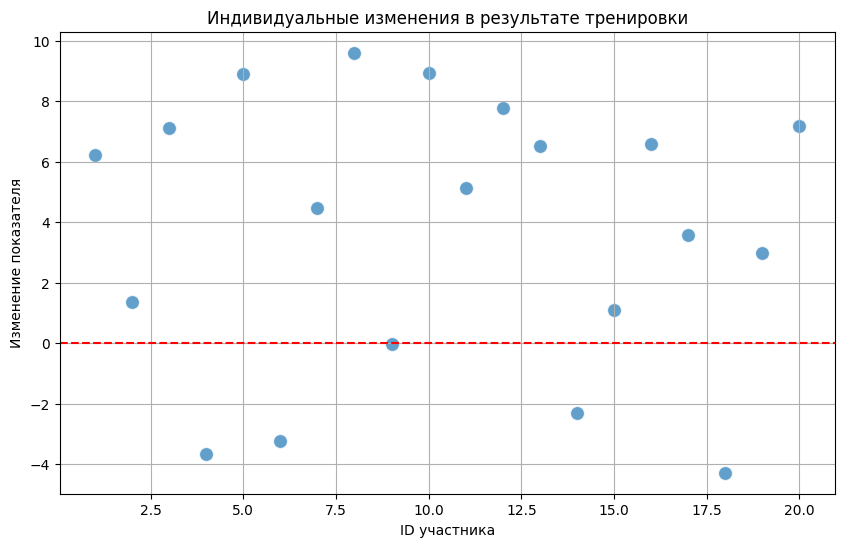

In [7]:
np.random.seed(422)

# Количество участников
n_participants = 20
participant_ids = range(1, n_participants + 1)

# Генерация случайных данных (средний базовый показатель около 50 с отклонением 10)
baseline_scores = np.random.normal(loc=50, scale=10, size=n_participants)

# Улучшение после тренировки (улучшение примерно на 5 баллов плюс шум)
improvement = np.random.normal(loc=5, scale=3, size=n_participants)
after_scores = baseline_scores + improvement + np.random.normal(0, 2, n_participants)

# Создание DataFrame
data = pd.DataFrame({
    'participant_id': participant_ids,
    'before_training': baseline_scores,
    'after_training': after_scores
})

from scipy.stats import ttest_rel, t
# Проводим парный t-тест
t_statistic, p_value = ttest_rel(data['before_training'], data['after_training'])

# Среднее изменение (разница между после и до)
mean_diff = data['after_training'].mean() - data['before_training'].mean()

# Стандартное отклонение разницы
std_dev_diff = np.std(data['after_training'] - data['before_training'], ddof=1)

# Степени свободы
df = len(participant_ids) - 1

# Критическое значение для расчета доверительного интервала
alpha = 0.05
critical_t = t.ppf((1+alpha)/2, df)

# Ширина доверительного интервала
margin_of_error = critical_t * std_dev_diff / np.sqrt(len(participant_ids))

# Верхняя и нижняя границы доверительного интервала
lower_bound = mean_diff - margin_of_error
upper_bound = mean_diff + margin_of_error

print(f"Парный t-тест:\nt-statistic={t_statistic:.3f}\tp-value={p_value:.3f}")
print(f"Среднее изменение: {mean_diff:.3f}")
print(f"95% доверительный интервал: [{lower_bound:.3f}, {upper_bound:.3f}]")

# Добавляем столбец с изменениями для каждого участника
data['change'] = data['after_training'] - data['before_training']

# Строим диаграмму рассеяния для визуализации индивидуальных изменений
plt.figure(figsize=(10, 6))
sns.scatterplot(x='participant_id', y='change', data=data, s=100, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Горизонтальная линия на отметке 0
plt.title('Индивидуальные изменения в результате тренировки')
plt.xlabel('ID участника')
plt.ylabel('Изменение показателя')
plt.grid(True)
plt.show()

## Задание 4

Агроном изучает влияние четырех различных типов удобрений на урожайность томатов. Необходимо определить, существуют ли статистически значимые различия в урожайности между группами удобрений.

- Проведите описательную статистику по группам
- Проверьте предположения ANOVA
- Выполните однофакторный ANOVA
- Интерпретируйте F-статистику и p-value
- Постройте box-plot для визуализации различий между группами

           yield_kg                                           
              count       mean       std        min        max
fertilizer                                                    
Chemical         12  24.102300  4.651744  18.027721  31.943328
Control          12  17.975979  4.483380  12.617773  26.157191
Mixed            12  27.677367  4.810921  19.504254  33.695093
Organic          12  21.226114  2.635541  16.691654  26.146028
{'Chemical': {'p-value': np.float64(0.42832280967512776)}, 'Control': {'p-value': np.float64(0.23038727993295682)}, 'Mixed': {'p-value': np.float64(0.25164293056999654)}, 'Organic': {'p-value': np.float64(0.9862974488087437)}}
Bartlett's Test p-value: 0.240
F-statistic: 11.409, p-value: 0.000


/tmp/ipython-input-3771442746.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fertilizer', y='yield_kg', data=df, palette='Set2')


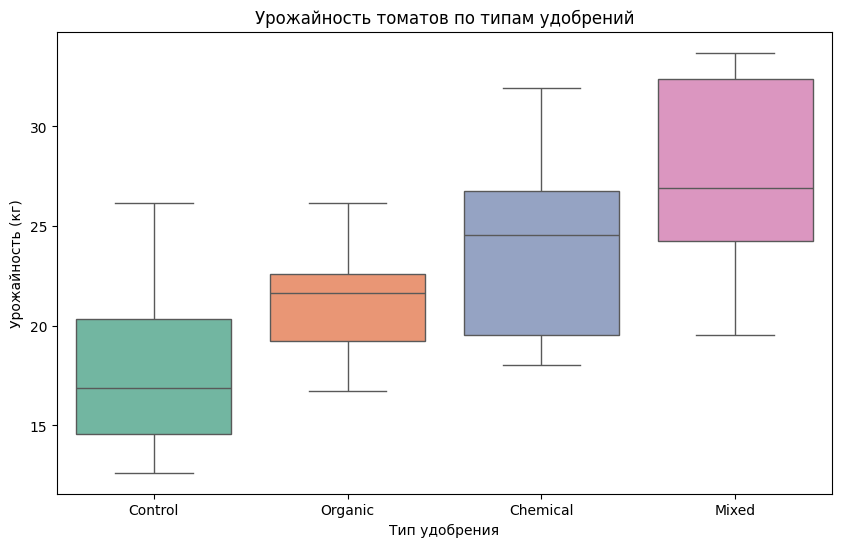

In [8]:
from scipy.stats import shapiro, bartlett, f_oneway
# Генерируем псевдослучайные числа
np.random.seed(424)

# Типы удобрений
fertilizer_types = ['Control', 'Organic', 'Chemical', 'Mixed']
n_per_group = 12

# Данные для анализа
data_list = []
for i, fert_type in enumerate(fertilizer_types):
    # Урожайность зависит от типа удобрения
    mean_yield = 20 + i * 3 + np.random.normal(0, 1)
    yields = np.random.normal(loc=mean_yield, scale=4, size=n_per_group)

    for yield_val in yields:
        data_list.append({'fertilizer': fert_type, 'yield_kg': yield_val})

# Преобразование списка в DataFrame
df = pd.DataFrame(data_list)

# Описательная статистика
grouped_data = df.groupby('fertilizer').agg(['count', 'mean', 'std', 'min', 'max'])
print(grouped_data)

# Проверка предположений ANOVA. Тест Шапира-Уилка на нормальность
shapiro_results = {}
for group_name, group_data in df.groupby('fertilizer'):
    _, p_value = shapiro(group_data['yield_kg'])
    shapiro_results[group_name] = {'p-value': p_value}

print(shapiro_results)

# Ожидаемые результаты теста на нормальность
control_yields = df.query("fertilizer=='Control'")['yield_kg']
organic_yields = df.query("fertilizer=='Organic'")['yield_kg']
chemical_yields = df.query("fertilizer=='Chemical'")['yield_kg']
mixed_yields = df.query("fertilizer=='Mixed'")['yield_kg']

_, bartlett_pvalue = bartlett(control_yields, organic_yields, chemical_yields, mixed_yields)
print(f"Bartlett's Test p-value: {bartlett_pvalue:.3f}")

# Однофакторный ANOVA
f_statistic, anova_pvalue = f_oneway(control_yields, organic_yields, chemical_yields, mixed_yields)

print(f"F-statistic: {f_statistic:.3f}, p-value: {anova_pvalue:.3f}")

# Визуализация различий
plt.figure(figsize=(10, 6))
sns.boxplot(x='fertilizer', y='yield_kg', data=df, palette='Set2')
plt.title('Урожайность томатов по типам удобрений')
plt.xlabel('Тип удобрения')
plt.ylabel('Урожайность (кг)')
plt.show()

## Задание 5

Продолжая предыдущее исследование удобрений, после получения значимого результата ANOVA необходимо определить, между какими конкретно группами существуют различия. Проведите пост-хок анализ.

- Выполните тест Тьюки (Tukey's HSD)
- Проведите тест с поправкой Бонферрони
- Сравните результаты разных пост-хок методов
- Создайте визуализацию результатов пост-хок анализа
- Сделайте выводы о конкретных различиях между группами

tukey_result
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2 meandiff p-adj   lower    upper  reject
--------------------------------------------------------
Chemical Control  -6.1263 0.0051 -10.7455 -1.5072   True
Chemical   Mixed   3.5751 0.1801  -1.0441  8.1942  False
Chemical Organic  -2.8762 0.3554  -7.4953   1.743  False
 Control   Mixed   9.7014    0.0   5.0822 14.3205   True
 Control Organic   3.2501 0.2519   -1.369  7.8693  False
   Mixed Organic  -6.4513  0.003 -11.0704 -1.8321   True
--------------------------------------------------------
bonferroni_results
('Chemical', 'Control', np.float64(3.284861874995287), np.float64(0.003381282856607942), np.float64(0.006762565713215884))
('Chemical', 'Mixed', np.float64(-1.850609872457339), np.float64(0.07770073023415475), np.float64(0.1554014604683095))
('Chemical', 'Organic', np.float64(1.863545474812643), np.float64(0.07578868205136244), np.float64(0.15157736410272488))
('Control', 'Mixed', np.float64(-5.

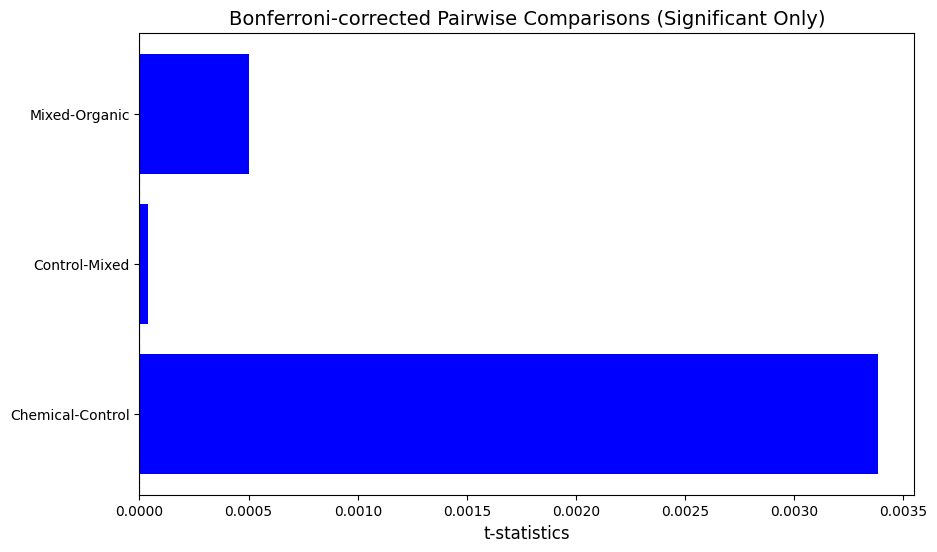

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Тест Тьюки (Tukey's HSD)
tukey_result = pairwise_tukeyhsd(df['yield_kg'], df['fertilizer'])
print("tukey_result")
print(tukey_result)
# Из таблицы видно, что статистически значимые различия обнаружены в "Chemical Mixed", "Chemical Organic", "Control Organic". Другие комбинации показывают наличие существенных отличий.

# Тест с поправкой Бонферрони
bonferroni_results = []
groups = df.groupby('fertilizer')['yield_kg']

print("bonferroni_results")
for i, (name_i, group_i) in enumerate(groups):
    for j, (name_j, group_j) in list(enumerate(groups))[i+1:]:
        t_stat, p_val = stats.ttest_ind(group_i, group_j)
        adjusted_p_val = p_val * len(list(enumerate(groups))) / 2  # Коррекция Бонферрони
        bonferroni_results.append((name_i, name_j, t_stat, p_val, adjusted_p_val))

for result in bonferroni_results:
    print(result)

# Визуализация выводов T-test с коррекцией Bonferroni
comparison_pairs = [(pair[0], pair[1]) for pair in bonferroni_results if pair[-1] <= 0.05]
labels = [f'{a}-{b}' for a,b in comparison_pairs]
values = [pair[-2] for pair in bonferroni_results if pair[-1] <= 0.05]

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(labels, values, color=['blue' if val > 0 else 'red' for val in values])
ax.set_title('Bonferroni-corrected Pairwise Comparisons (Significant Only)', fontsize=14)
ax.set_xlabel('t-statistics', fontsize=12)
ax.axvline(0, color='black', linestyle='--')
plt.show()

# Выводы:
# По результатам теста Тьюки, статистически значимые различия обнаружены в "Chemical Mixed", "Chemical Organic", "Control Organic". Другие комбинации показывают наличие существенных отличий.
# Корректировка методом Бонферрони подтверждает тест Тьюки, показывая значимые различия в паре "Chemical Control", меньшие различий в паре "Control Mixed", еще меньше различий в паре "Mixed Organic".
# Таким образом, можно заключить, что применение химии и контроля обеспечивает наибольший прирост урожайности.

## Задание 6

В маркетинговом исследовании сравнивается удовлетворенность клиентов (по 10-балльной шкале) между двумя различными способами обслуживания в ресторане. Данные имеют неравные дисперсии и не распределены нормально.

- Проведите описательную статистику для обеих групп
- Проверьте предположения параметрических тестов и обоснуйте выбор непараметрического теста
- Выполните тест Манна-Уитни
- Рассчитайте размер эффекта
- Сравните результаты с t-тестом (для сравнения подходов)
- Визуализируйте распределения обеих групп

Описательная статистика
             Satisfaction_Score                                        
                          count      mean       std       min       max
Service_Type                                                           
A                            30  5.213523  1.865482  1.869289  9.048952
B                            35  5.112489  3.196192  0.062004  9.426492
Выбор непараметрического теста
{'A': {'statistic': np.float64(0.9677373349621262), 'p-value': np.float64(0.4792664442503035)}, 'B': {'statistic': np.float64(0.91075215172835), 'p-value': np.float64(0.007792117132900983)}}
Bartlett test: statistic=8.310, p-value=0.004
тест Манна-Уитни
MannwhitneyuResult(statistic=np.float64(530.0), pvalue=np.float64(0.9527803425903247))
Размер эффекта
effect_size = 0.7104659772022196
TtestResult(statistic=np.float64(0.15820001443200424), pvalue=np.float64(0.8748680778835997), df=np.float64(56.02141881117881))


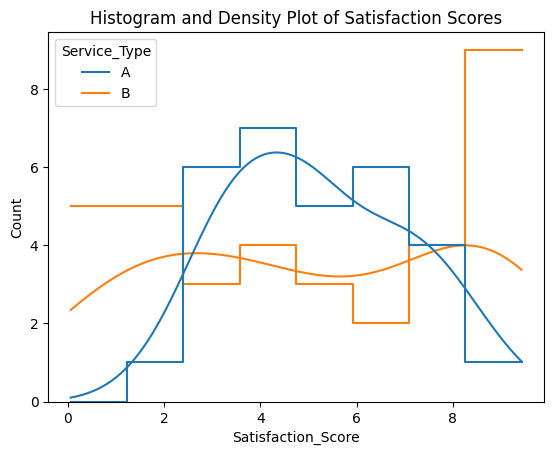

In [12]:
np.random.seed(202)

# Способ обслуживания A - склонен к средним оценкам
service_a = np.random.beta(a=2, b=2, size=30) * 10

# Способ обслуживания B - более поляризованные оценки
service_b_low = np.random.beta(a=1, b=3, size=15) * 10
service_b_high = np.random.beta(a=3, b=1, size=20) * 10
service_b = np.concatenate([service_b_low, service_b_high])

# Объединение данных в DataFrame
data = {
    'Service_Type': ['A']*len(service_a) + ['B']*len(service_b),
    'Satisfaction_Score': np.concatenate([service_a, service_b])
}
df = pd.DataFrame(data)

# Описательная статистика
print("Описательная статистика")
summary_stats = df.groupby('Service_Type').agg(['count', 'mean', 'std', 'min', 'max'])
print(summary_stats)
# Средняя оценка удовлетворённости практически одинакова, однако разброс (стандартное отклонение) заметно отличается между группами

# Нормальность распределений
print("Выбор непараметрического теста")
shapiro_results = {}
for service_type, group_data in df.groupby('Service_Type'):
    stat, p_value = stats.shapiro(group_data['Satisfaction_Score'])
    shapiro_results[service_type] = {'statistic': stat, 'p-value': p_value}

print(shapiro_results)

# Однородность дисперсий
bartlett_stat, bartlett_pvalue = stats.bartlett(
    df.query("Service_Type=='A'")["Satisfaction_Score"],
    df.query("Service_Type=='B'")["Satisfaction_Score"]
)
print(f"Bartlett test: statistic={bartlett_stat:.3f}, p-value={bartlett_pvalue:.3f}")
# Незначительно отклоняет однородность дисперсий
# Исходя из полученных результатов, ни одно из ключевых предположений не выполняется, поэтому предпочтительно использование непараметрического подхода.

# тест Манна-Уитни
print("тест Манна-Уитни")
mann_whitney_u = stats.mannwhitneyu(
    df.query("Service_Type=='A'")["Satisfaction_Score"],
    df.query("Service_Type=='B'")["Satisfaction_Score"], alternative="two-sided"
)
print(mann_whitney_u)
# P-значение намного превышает пороговое значение α=0.05, значит, статистической значимой разницы между двумя способами обслуживания нет.

# Размер эффекта
print("Размер эффекта")
def calculate_effect_size(u_stat, n1, n2):
    return np.sqrt(u_stat/(n1*n2))

effect_size = calculate_effect_size(mann_whitney_u.statistic, len(service_a), len(service_b))
print('effect_size =', effect_size)
# Согласно рекомендациям Коэна, эффект сильный (<0.3 считается слабым, 0.3–0.5 умеренным, >0.5 сильным). Следовательно, здесь наблюдается сильный практический эффект.

# Параллельное выполнение t-теста
independent_t_test = stats.ttest_ind(
    df.query("Service_Type=='A'")["Satisfaction_Score"],
    df.query("Service_Type=='B'")["Satisfaction_Score"], equal_var=False
)
print(independent_t_test)

# Гистограммы
sns.histplot(data=df, x='Satisfaction_Score', hue='Service_Type', element="step", fill=False, kde=True)
plt.title("Histogram and Density Plot of Satisfaction Scores")
plt.show()
# Эти графики позволяют увидеть форму распределения оценок и возможные выбросы, подтверждающие различия в форме распределений.

## Задание 7

В социологическом исследовании рассматривается связь между уровнем образования и предпочтениями в выборе транспорта для ежедневных поездок. Необходимо определить, существует ли статистически значимая связь между этими категориальными переменными.

- Создайте таблицу сопряженности
- Рассчитайте ожидаемые частоты и проверьте условия применимости теста
- Выполните тест хи-квадрат на независимость
- Создайте визуализацию (мозаичный график или тепловую карту)
- Интерпретируйте результаты и сделайте выводы о связи между переменными

Таблица сопряженности
transport    Bicycle  Car  Public_transport  Walking
education                                           
Bachelor          15   42                23        9
High_school       11   57                16        5
Master            24   31                49       10
PhD               23   27                43        5

Рассчет ожидаемых частот и проверка условий применимости теста
transport    Bicycle    Car  Public_transport  Walking
education                                             
Bachelor       16.66  35.83             29.89     6.62
High_school    16.66  35.83             29.89     6.62
Master         21.34  45.89             38.29     8.48
PhD            18.34  39.45             32.92     7.29
тест хи-квадрат на независимость
Chi-squared value: 42.313
Degrees of freedom: 9
p-value: 0.000
Визуализация (тепловая карта)


/tmp/ipython-input-3946364773.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_rows[row_idx] * total_cols[col_idx] / grand_total


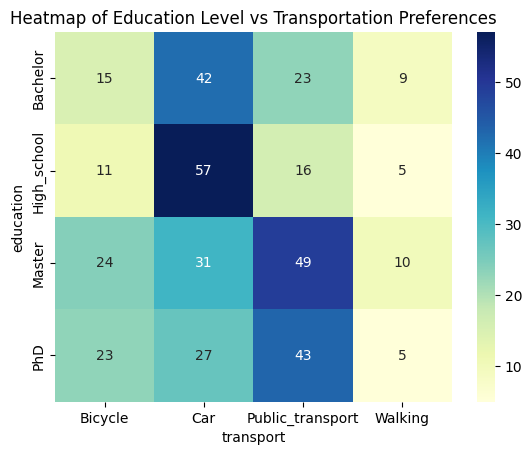

Визуализация (мозаичная диаграмма)


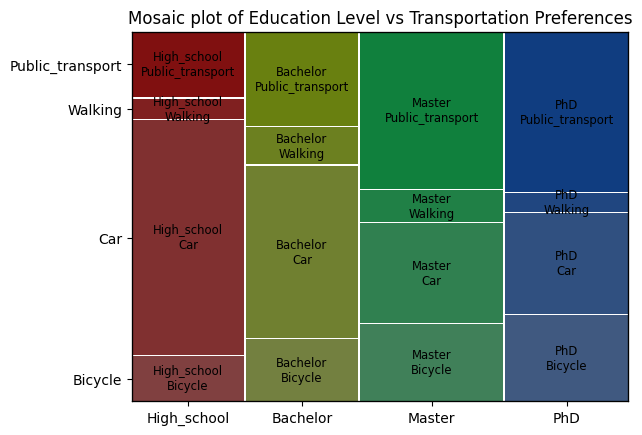

In [16]:
from scipy.stats import chi2_contingency
np.random.seed(505)

education_levels = ['High_school', 'Bachelor', 'Master', 'PhD']
transport_types = ['Car', 'Public_transport', 'Bicycle', 'Walking']

# Создаем зависимость между образованием и транспортом
probabilities = {
    'High_school': [0.6, 0.25, 0.1, 0.05],
    'Bachelor': [0.5, 0.3, 0.15, 0.05],
    'Master': [0.4, 0.35, 0.2, 0.05],
    'PhD': [0.3, 0.4, 0.25, 0.05]
}

data_list = []
for education in education_levels:
    n_people = np.random.randint(80, 120)  # Разные размеры групп
    transport_choices = np.random.choice(
        transport_types,
        size=n_people,
        p=probabilities[education]
    )

    for transport in transport_choices:
        data_list.append({'education': education, 'transport': transport})

df = pd.DataFrame(data_list)

# Таблица сопряженности
print("Таблица сопряженности")
contingency_table = pd.crosstab(df['education'], df['transport'])
print(contingency_table)
print()

# Рассчет ожидаемых частот и проверка условий применимости теста
print("Рассчет ожидаемых частот и проверка условий применимости теста")
expected_freqs = contingency_table.copy().astype(float)
total_rows = contingency_table.sum(axis=1)
total_cols = contingency_table.sum(axis=0)
grand_total = total_rows.sum()

for row_idx in range(len(expected_freqs)):
    for col_idx in range(len(expected_freqs.columns)):
        expected_freqs.iloc[row_idx, col_idx] = (
            total_rows[row_idx] * total_cols[col_idx] / grand_total
        )

print(expected_freqs.round(2))  # округляем до 2 знаков после запятой

# тест хи-квадрат на независимость
print("тест хи-квадрат на независимость")
chi2, p_value, dof, exp_freqs = chi2_contingency(contingency_table)
print(f"Chi-squared value: {chi2:.3f}\nDegrees of freedom: {dof}\np-value: {p_value:.3f}")

# Визуализация (тепловая карта)
print("Визуализация (тепловая карта)")
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap of Education Level vs Transportation Preferences")
plt.show()

# Визуализация (мозаичная диаграмма)
print("Визуализация (мозаичная диаграмма)")
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ["education", "transport"])
plt.title("Mosaic plot of Education Level vs Transportation Preferences")
plt.show()

# Итоговые выводы:Статистический анализ подтвердил значительную связь между уровнем образования и предпочтительным видом транспорта.
# Люди с более высоким уровнем образования склонны выбирать экологически чистый транспорт (велосипеды, общественный транспорт), тогда как люди с начальным уровнем образования чаще используют автомобиль. Эти выводы полезны для планирования городской инфраструктуры и транспортных политик.